In [151]:
import numpy as np
import pandas as pd

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
import neattext.functions as nfx

In [154]:
df = pd.read_csv("project_tweet_emotions.csv")

In [155]:
df.head()

,tweet_id,Emotion,Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [156]:
df.shape

(40000, 3)

In [157]:
df.dtypes

tweet_id     int64
Emotion     object
Text        object
dtype: object

In [158]:
df.isnull().sum()

tweet_id    0
Emotion     0
Text        0
dtype: int64

In [159]:
df['Emotion'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: Emotion, dtype: int64

<Axes: >

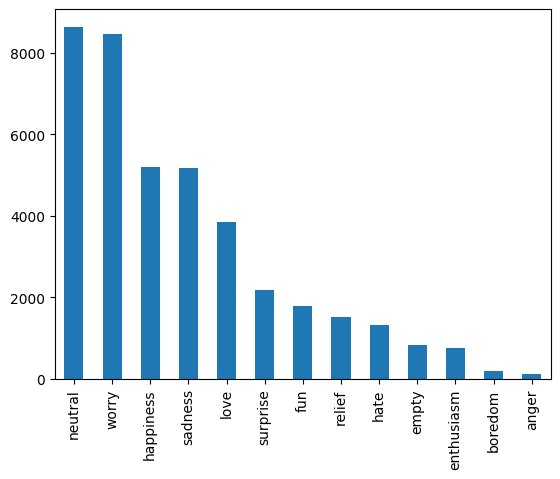

In [160]:
df['Emotion'].value_counts().plot(kind='bar')

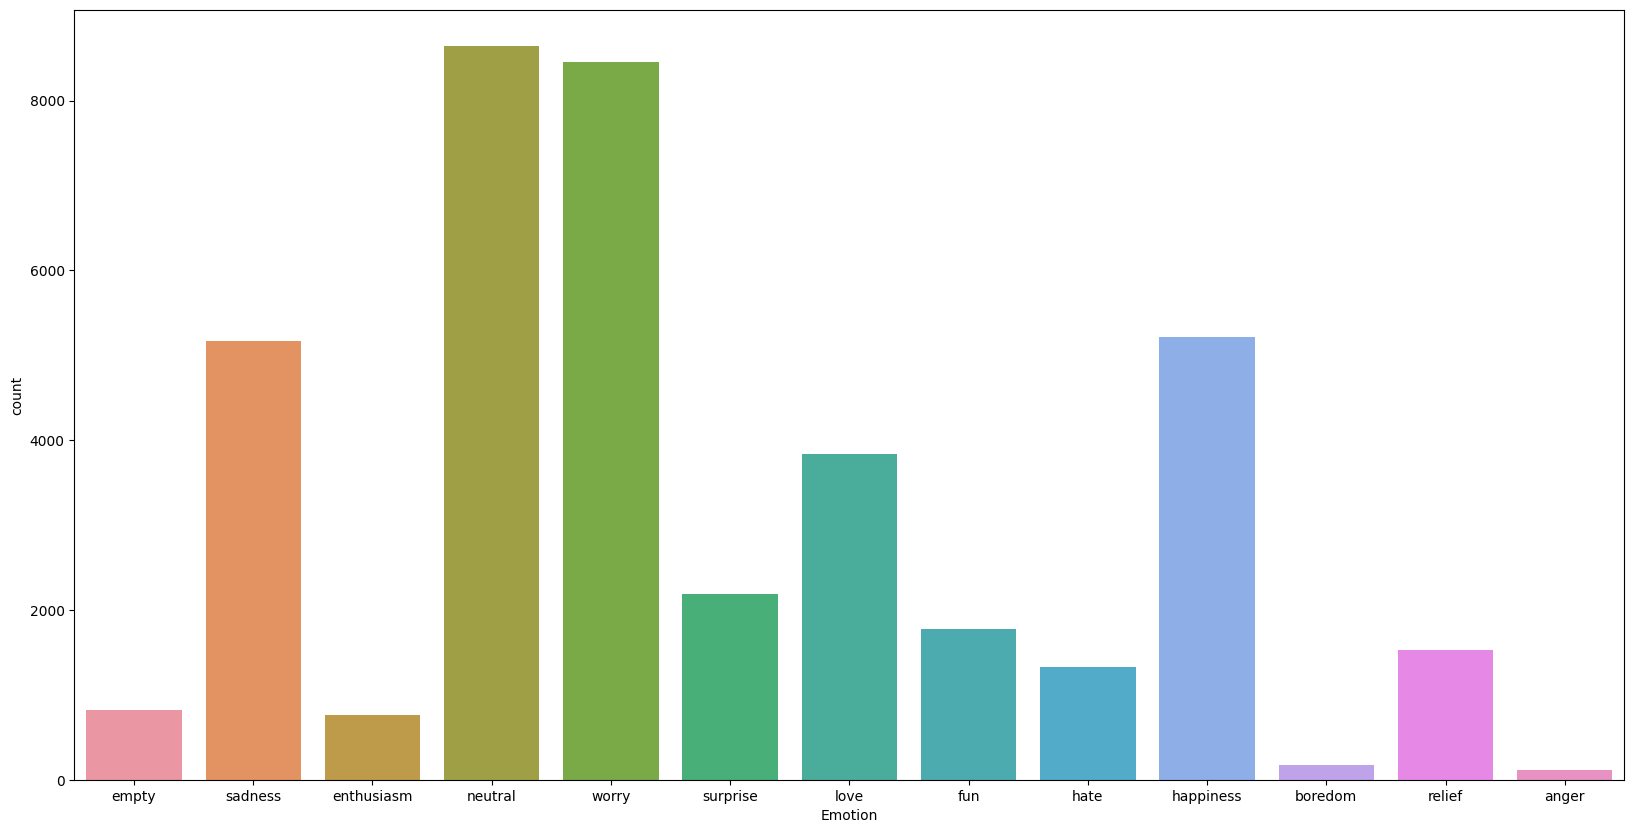

In [161]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

### Exploration
+ Text cleaning
+ Sentiment analysis
+ Keyword extruction
    - Keyword for each emotion
    - Worscloud

In [162]:
#Sentiment analysis
from textblob import TextBlob

In [163]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [164]:
get_sentiment("Nice to meet you")

'Positive'

In [165]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [166]:
df.head()

,tweet_id,Emotion,Text,Sentiment
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral


In [167]:
df.groupby(['Emotion','Sentiment']).size()

Emotion     Sentiment
anger       Negative       34
            Neutral        41
            Positive       35
boredom     Negative       80
            Neutral        56
            Positive       43
empty       Negative      168
            Neutral       418
            Positive      241
enthusiasm  Negative      100
            Neutral       254
            Positive      405
fun         Negative      205
            Neutral       474
            Positive     1097
happiness   Negative      345
            Neutral      1224
            Positive     3640
hate        Negative      694
            Neutral       364
            Positive      265
love        Negative      214
            Neutral       684
            Positive     2944
neutral     Negative     1156
            Neutral      4442
            Positive     3040
relief      Negative      207
            Neutral       477
            Positive      842
sadness     Negative     1886
            Neutral      1696
            Positi

<Axes: xlabel='Emotion,Sentiment'>

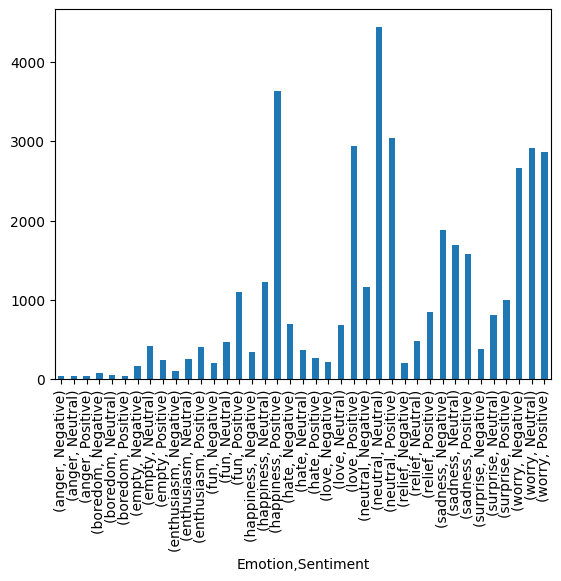

In [168]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

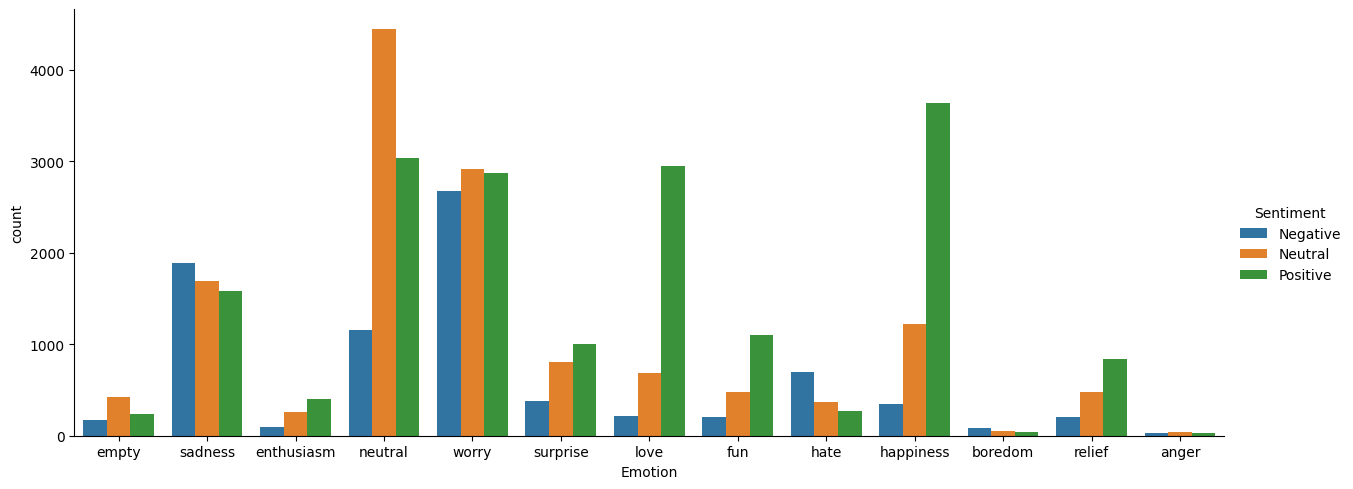

In [221]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',aspect=2.5)

### Text cleaning
+ Remove Noice
    - Stopeords
    - Special Characters
    - Punctuations
    - emojis

In [170]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [171]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [172]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [173]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [174]:
df[['Text', 'Clean_Text']]

,Text,Clean_Text
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started frea...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


### Keyword Extruction
+ Extract most commonest words per class of emotion

In [175]:
from collections import Counter

In [176]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [177]:
# List of Emotion
emotion_list = df['Emotion'].unique().tolist()

In [178]:
emotion_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [233]:
fun_list = df[df['Emotion'] == 'fun']['Clean_Text'].tolist()
sadness_list = df[df['Emotion'] == 'sadness']['Clean_Text'].tolist()
worry_list = df[df['Emotion'] == 'worry']['Clean_Text'].tolist()
love_list = df[df['Emotion'] == 'love']['Clean_Text'].tolist()
hate_list = df[df['Emotion'] == 'hate']['Clean_Text'].tolist()
happiness_list = df[df['Emotion'] == 'happiness']['Clean_Text'].tolist()
boredom_list = df[df['Emotion'] == 'boredom']['Clean_Text'].tolist()
relief_list = df[df['Emotion'] == 'relief']['Clean_Text'].tolist()
anger_list = df[df['Emotion'] == 'anger']['Clean_Text'].tolist()

In [246]:
# Joy Document
fun_docx = ' '.join(fun_list)
sadness_docx = ' '.join(sadness_list)
worry_docx = ' '.join(worry_list)
love_docx = ' '.join(love_list)
hate_docx = ' '.join(hate_list)
happiness_docx = ' '.join(happiness_list)
boredom_docx = ' '.join(boredom_list)
relief_docx = ' '.join(relief_list)
anger_docx = ' '.join(anger_list)

keywords_docx = fun_docx + sadness_docx + worry_docx + love_docx + hate_docx + happiness_docx + happiness_docx + relief_docx + anger_docx

In [247]:
keywords_docx

'Wondering Im awake 7amwriting new songplotting evil secret plots muahahahaoh damn itnot secret anymore   lt3 gonna twitter ) cause amazing lol come canada perform RIP leonardo great mini fiddler crab   out memo looks amazing   OMG Ur alive LOL 2day gone sooo slow Im going insane Grrr tonight   california vintage ahahah BEST dresses want dont ebay (    Umm yeah Thats probably pretty good note self eeeeeewwwwwwww   Thats awesome weekend cant Im moving Sat lot fun finished im not color drawing come   Lettuce amp spinach best cool weather live floridanot luck growing those   know enjoy watching twitter entertaining comic miss BFF rocking Hotel California now   songs stay same Whats next Hmmm Careless whisper   dissapointment hhaha creeped ice cream social good times lars real girl sad movie playing street fighter IV Seth Raped clear DVR getting rid tomorrw   hell yeah missed u nite lol u like opinion wish   burning trees trying dresses spent 2 hours playing TF2 think Im better started unn

In [237]:
# Extract Keyword
keyword_fun = extract_keywords(fun_docx)
keyword_sadness = extract_keywords(sadness_docx)
keyword_worry = extract_keywords(worry_docx)
keyword_love = extract_keywords(love_docx)
keyword_hate = extract_keywords(hate_docx)
keyword_happiness = extract_keywords(happiness_docx)
keyword_boredom = extract_keywords(boredom_docx)
keyword_relief = extract_keywords(relief_docx)
keyword_anger = extract_keywords(anger_docx)

In [ ]:
keywords_all = {}
keywords_all.update(keyword_fun)
keywords_all.update(keyword_sadness)
keywords_all.update(keyword_worry)
keywords_all.update(keyword_love)
keywords_all.update(keyword_hate)
keywords_all.update(keyword_happiness)
keywords_all.update(keyword_boredom)
keywords_all.update(keyword_relief)
keywords_all.update(keyword_anger)

keywords_all

In [242]:
# Plot
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(40,30))
    plt.title("Plot of Most common keyword")
    sns.barplot(x='token', y='count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()

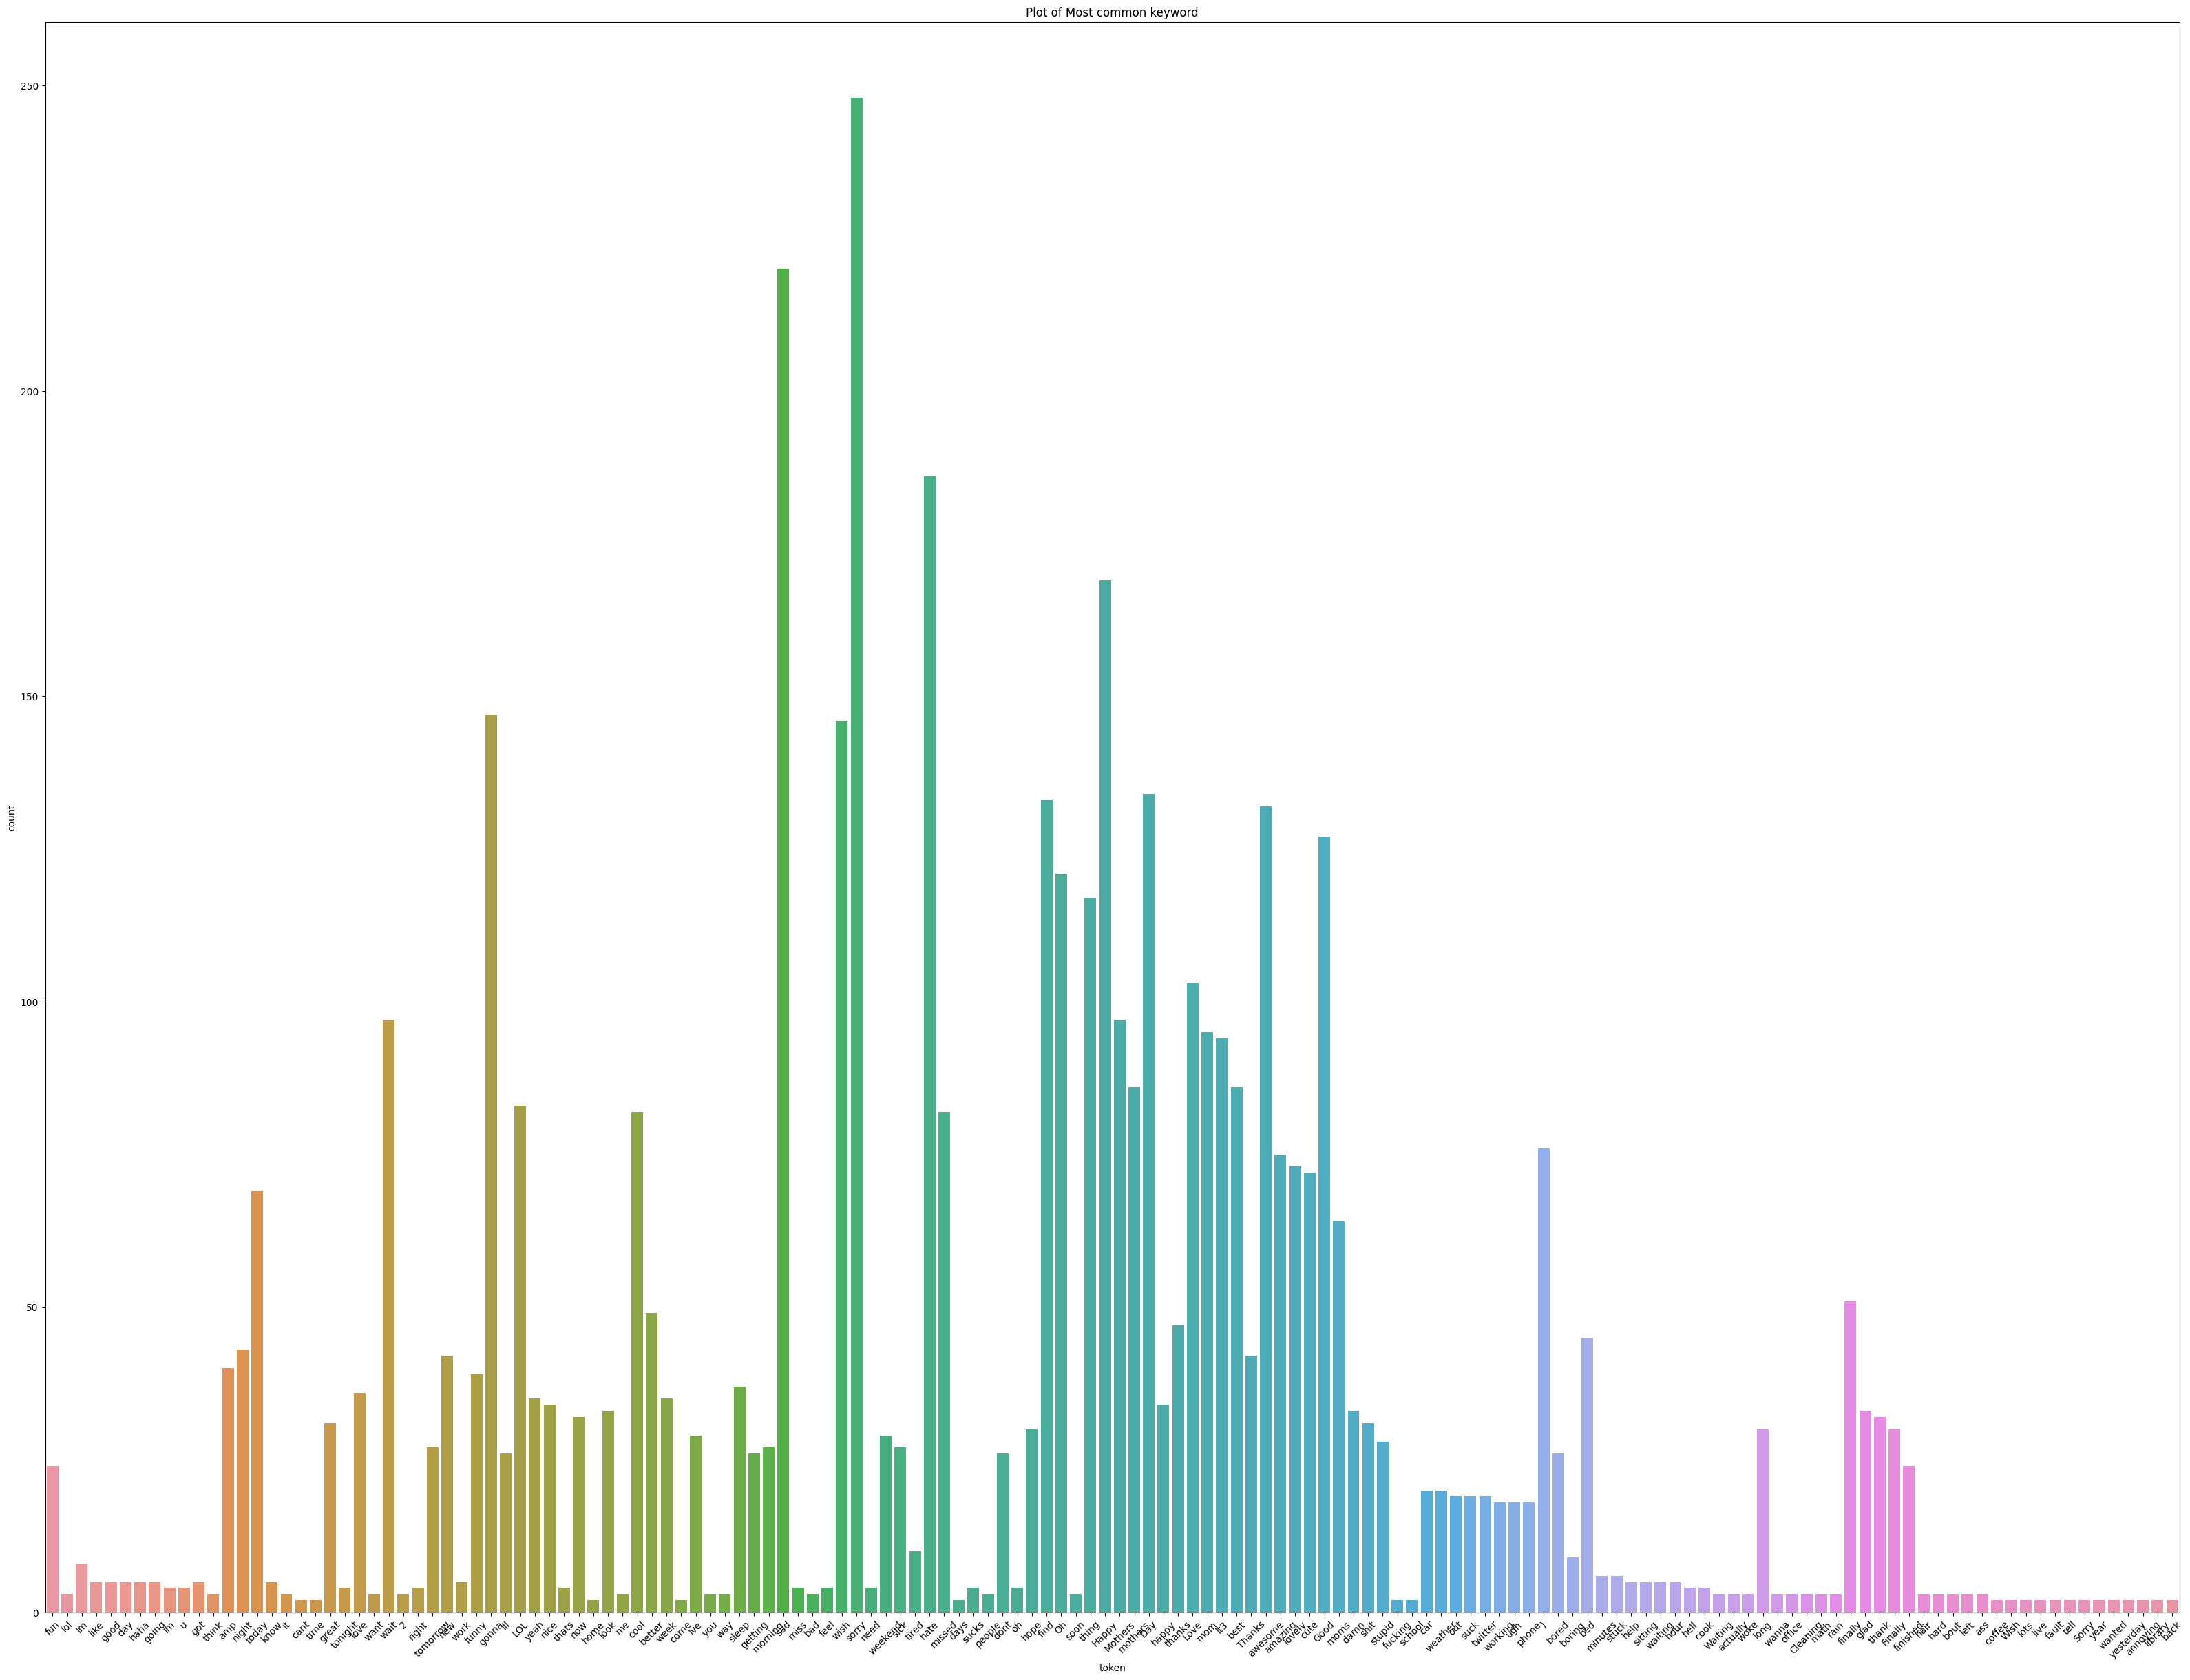

In [243]:
plot_most_common_words(keywords_all)

In [244]:
### Word cloud
from wordcloud import WordCloud

In [248]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

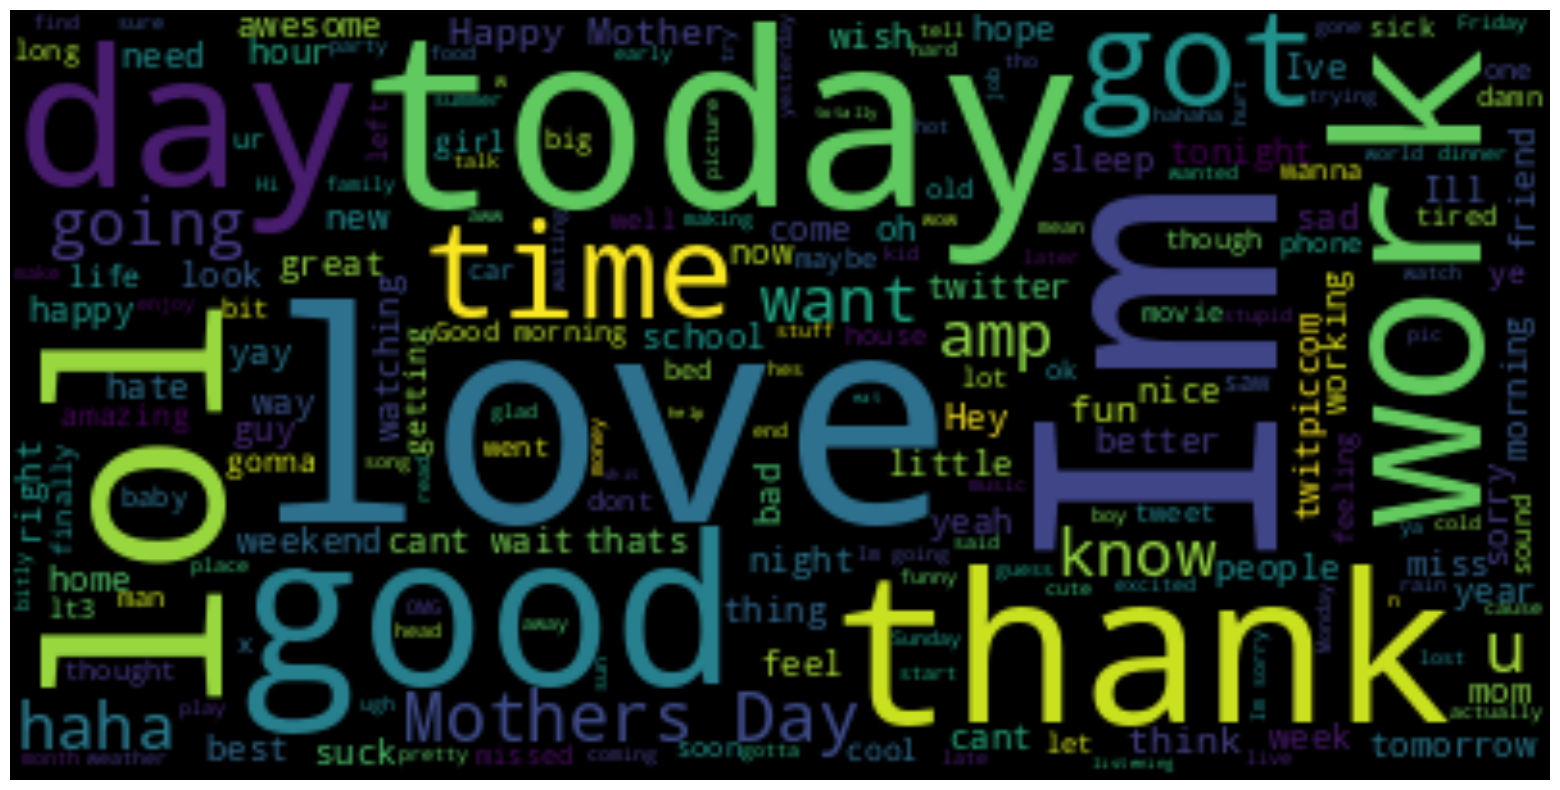

In [249]:
plot_wordcloud(keywords_docx)

### Machine Learning
+ Naive Bayes
+ LogisticRegression




In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [193]:
# Split dataset
from sklearn.model_selection import train_test_split

### Build features from our Text

In [194]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [195]:
Xfeatures

0          know listenin bad habit earlier started frea...
1                   Layin n bed headache ughhhhwaitin call
2                            Funeral ceremonygloomy friday
3                                  wants hang friends SOON
4                          want trade Houston tickets will
                               ...                        
39995                                                     
39996                               Happy Mothers Day love
39997    Happy Mothers Day mommies there woman man long...
39998      WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...
39999      bullet train tokyo gf visiting japan thursda...
Name: Clean_Text, Length: 40000, dtype: object

In [196]:
# Vectorizer
# cv = CountVectorizer()
# X = cv.fit_transform(Xfeatures)

In [277]:
tf = TfidfVectorizer()
X = tf.fit_transform(Xfeatures)

In [278]:
# Get features by name 
tf.get_feature_names_out()

array(['00', '000', '002', ..., '½you', '½z', '½ï'], dtype=object)

In [198]:
# X.toarray()

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X,ylabels,test_size=0.2,random_state=42)

### Build our model

In [280]:
nv_model= MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [281]:
# Accuracy
nv_model.score(X_test, y_test)

0.2925

In [282]:
y_pred_for_nv = nv_model.predict(X_test)

In [283]:
y_pred_for_nv

array(['neutral', 'neutral', 'worry', ..., 'neutral', 'worry', 'neutral'],
      dtype='<U10')

### Make a single pradiction
+ Vectorized our text
+ Applied our model

In [284]:
sample_text = ["I love coding so much"]

In [285]:
vect = tf.transform(sample_text).toarray()

In [286]:
nv_model.predict(vect)

array(['neutral'], dtype='<U10')

In [287]:
# Chech for the pradiction probability (percentage)
nv_model.predict_proba(vect)

array([[2.78011769e-04, 5.58088747e-04, 3.91538645e-03, 3.44475648e-03,
        1.65144887e-02, 1.09114865e-01, 8.52356764e-03, 1.43448723e-01,
        2.95003638e-01, 1.10495046e-02, 9.86858090e-02, 2.27355424e-02,
        2.86727617e-01]])

In [288]:
nv_model.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype='<U10')

In [289]:
np.max(nv_model.predict_proba(vect))

0.2950036384122928

In [290]:
def predict_emotion(sample_text,model):
    myvect = tf.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{}, Pradiction Score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [291]:
predict_emotion(sample_text,nv_model)

Prediction:neutral, Pradiction Score:0.2950036384122928


{'anger': 0.00027801176931621923,
 'boredom': 0.0005580887469166946,
 'empty': 0.003915386445088476,
 'enthusiasm': 0.0034447564826650305,
 'fun': 0.01651448869391183,
 'happiness': 0.10911486539960273,
 'hate': 0.00852356764353424,
 'love': 0.14344872300965616,
 'neutral': 0.2950036384122928,
 'relief': 0.011049504636320859,
 'sadness': 0.09868580898524643,
 'surprise': 0.022735542358433586,
 'worry': 0.28672761741701497}

In [292]:
predict_emotion(["He hates running all the day"],nv_model)

Prediction:worry, Pradiction Score:0.3883038369087409


{'anger': 0.0002374962138858584,
 'boredom': 0.0005313016867931371,
 'empty': 0.0029705091563282204,
 'enthusiasm': 0.003035213149677765,
 'fun': 0.01873007138778377,
 'happiness': 0.06967556631414167,
 'hate': 0.018024685623918933,
 'love': 0.05303611562949158,
 'neutral': 0.1960060428096066,
 'relief': 0.009712420252745622,
 'sadness': 0.2112707043754561,
 'surprise': 0.028466036491429078,
 'worry': 0.3883038369087409}

### Model Evolution

In [293]:
# Classification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.00      0.00      0.00       338
   happiness       0.40      0.14      0.21      1028
        hate       0.00      0.00      0.00       268
        love       0.58      0.15      0.24       762
     neutral       0.30      0.51      0.37      1740
      relief       0.00      0.00      0.00       352
     sadness       0.40      0.02      0.04      1046
    surprise       0.00      0.00      0.00       425
       worry       0.27      0.70      0.39      1666

    accuracy                           0.29      8000
   macro avg       0.15      0.12      0.10      8000
weighted avg       0.28      0.29      0.22      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
# confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    6,    0,    0,
           0,   13],
       [   0,    0,    0,    0,    0,    0,    0,    0,    6,    0,    0,
           0,   25],
       [   0,    0,    0,    0,    0,    5,    0,    1,   80,    0,    0,
           0,   76],
       [   0,    0,    0,    0,    0,    5,    0,    1,   81,    0,    1,
           0,   75],
       [   0,    0,    0,    0,    0,   28,    0,    3,  146,    0,    1,
           0,  160],
       [   0,    0,    0,    0,    0,  148,    0,   37,  446,    0,    1,
           0,  396],
       [   0,    0,    0,    0,    0,    2,    0,    0,   68,    0,    2,
           0,  196],
       [   0,    0,    0,    0,    0,   83,    0,  118,  278,    0,    5,
           0,  278],
       [   0,    0,    0,    0,    0,   28,    0,   19,  888,    0,    6,
           0,  799],
       [   0,    0,    0,    0,    0,   15,    0,    5,  155,    0,    0,
           0,  177],
       [   0,    0,    0,    0,    0,    7,    0, 

### Save Model

In [295]:
import joblib

In [296]:
model_file = open("emotional_classifier_nv_model.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

##Logistic Regression

In [297]:
# LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [298]:
lr_model.score(X_test,y_test)

0.332375

In [299]:
predict_emotion(sample_text,lr_model)

Prediction:love, Pradiction Score:0.5327031411055638


{'anger': 0.002702995689264518,
 'boredom': 0.0044042776156253275,
 'empty': 0.013387405947635978,
 'enthusiasm': 0.014491800373132042,
 'fun': 0.0318865253173615,
 'happiness': 0.07859419139793754,
 'hate': 0.017703223564663795,
 'love': 0.5327031411055638,
 'neutral': 0.09708013368861856,
 'relief': 0.021961906156156515,
 'sadness': 0.06215419382293334,
 'surprise': 0.04264865351942751,
 'worry': 0.08028155180167967}

##Decision Tree

In [300]:
from sklearn.tree import DecisionTreeClassifier

In [301]:
clf = DecisionTreeClassifier()

In [302]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [303]:
y_pred = clf.predict(X_test)

In [304]:
accuracy = accuracy_score(y_test, y_pred)

In [305]:
accuracy

0.2715

##SVM

In [306]:
from sklearn.svm import SVC

In [307]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [308]:
svc_pred = classifier.predict(X_test)

In [309]:
svc_accuracy = accuracy_score(y_test, svc_pred)

In [310]:
svc_accuracy

0.338

##Random forest

In [268]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [270]:
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)

In [271]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [272]:
yrf_pred = rf_model.predict(X_test)

In [273]:
rf_accuracy = accuracy_score(y_test, yrf_pred)

In [274]:
rf_accuracy

0.3095